In [1]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [2]:
train = pd.read_csv('./1- Datasets/train_general2.csv')

In [3]:
test = pd.read_csv('./1- Datasets/test.csv', keep_default_na=False, na_values=[''])

In [4]:
train.shape

(2008, 81)

In [5]:
train.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000


In [6]:
data_dummies_initial = pd.get_dummies(train, columns=['Bldg Type','House Style','Condition 1','Condition 2','Lot Config'], drop_first=True)

In [7]:
data_dummies_highest = pd.get_dummies(train, columns=['Garage Cond','Bsmt Cond','Exter Cond'], drop_first=True)

In [8]:
data_dummies_fixable = pd.get_dummies(train, columns=['Neighborhood','Exterior 1st','Exterior 2nd','Fireplace Qu','Kitchen Qual'], drop_first = True)

In [9]:
data_dummies_neighborhood = pd.get_dummies(train, columns=['Neighborhood'], drop_first=True)

In [10]:
data_dummies_fixable.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Fireplace Qu_TA,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,0,0,0,1,0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,1,0,0,0,0,0,1,0,1,0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,1,0,0,0,0,0,0,0,1,0


### Obtaining best correlations

In [11]:
sale_price_corr = data_dummies_highest.corr()['SalePrice']

In [12]:
# Change max number of rows (to 101, for example)
pd.set_option("display.max_rows", 150)

In [13]:
# discover dummy correlations
sale_price_corr.sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.808348
Gr Liv Area        0.708928
Garage Cars        0.666776
Garage Area        0.653270
Total Bsmt SF      0.645308
1st Flr SF         0.632111
Year Built         0.582502
Year Remod/Add     0.560220
Garage Yr Blt      0.544042
Full Bath          0.534464
TotRms AbvGrd      0.477248
Mas Vnr Area       0.473547
Fireplaces         0.471560
BsmtFin SF 1       0.423343
Lot Frontage       0.366854
Open Porch SF      0.349321
Wood Deck SF       0.333227
Lot Area           0.285845
Garage Cond_TA     0.282256
Half Bath          0.278031
Bsmt Full Bath     0.276017
2nd Flr SF         0.249148
Bsmt Unf SF        0.186016
Bsmt Cond_Gd       0.134182
Bedroom AbvGr      0.125151
Exter Cond_TA      0.123668
Screen Porch       0.090830
Bsmt Cond_TA       0.079392
3Ssn Porch         0.057925
Pool Area          0.038262
Mo Sold            0.036366
Garage Cond_Gd     0.023423
BsmtFin SF 2      -0.005759
Misc Val          -0.007232
Bsmt Cond_Po      -0

### Creating X and y

In [14]:
X=data_dummies_highest[['Overall Qual', 'Gr Liv Area','Garage Cars', 'Garage Area','Total Bsmt SF','Garage Cond_TA','Bsmt Cond_Gd','Exter Cond_TA']]

In [15]:
X.shape

(2008, 8)

In [16]:
y = data_dummies_fixable['SalePrice']

In [17]:
y.shape

(2008,)

### Train-test splitting

In [18]:
# X before y; train before test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
# Get the shapes the training and testing subsets
print("X Shapes:")
print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")
print(" ")
print("y Shapes:")
print(f"Train: {y_train.shape}")
print(f"Test: {y_test.shape}")

X Shapes:
Train: (1506, 8)
Test: (502, 8)
 
y Shapes:
Train: (1506,)
Test: (502,)


### Linear Regression model fit

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.8129545302953611, 0.8255364061043157)

In [22]:
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

In [23]:
cross_val_predict(estimator=lr, X=X, y=y)[0:10]

array([165610.56530772, 229793.2894145 , 118018.4623237 , 125364.84924193,
       171059.763494  , 220253.64100435, 141548.96700073, 149692.23645244,
       115364.61179564, 185837.10131675])

### Cross Validation

In [24]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [25]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr_scores.mean()

0.8096900356783218

In [26]:
display(X_test.shape, X_train.shape,y_train.shape,y_test.shape)

(502, 8)

(1506, 8)

(1506,)

(502,)

In [27]:
cross_val_predict(estimator=lr, X=X, y=y)[0:10]

array([165610.56530772, 229793.2894145 , 118018.4623237 , 125364.84924193,
       171059.763494  , 220253.64100435, 141548.96700073, 149692.23645244,
       115364.61179564, 185837.10131675])

## Interpreting Slopes for dummie variables

In [28]:
features = ['Overall Qual', 'Gr Liv Area','Garage Cars', 'Garage Area','Total Bsmt SF','Garage Cond_TA','Bsmt Cond_Gd','Exter Cond_TA']

In [29]:
list(zip(features, lr.coef_))

[('Overall Qual', 22220.81409721702),
 ('Gr Liv Area', 46.19185930554918),
 ('Garage Cars', 6943.4239197068455),
 ('Garage Area', 46.705384041603764),
 ('Total Bsmt SF', 36.69379693546824),
 ('Garage Cond_TA', -4911.299822331424),
 ('Bsmt Cond_Gd', 5532.293924262402),
 ('Exter Cond_TA', -2587.9909574247285)]

In [30]:
# Use a data frame
pd.DataFrame(lr.coef_, index=features, columns=['Coefficient'])

,Coefficient
Overall Qual,22220.814097
Gr Liv Area,46.191859
Garage Cars,6943.423920
Garage Area,46.705384
Total Bsmt SF,36.693797
Garage Cond_TA,-4911.299822
Bsmt Cond_Gd,5532.293924
Exter Cond_TA,-2587.990957


In [31]:
[f'{X.columns[i]}: {lr.coef_[i]}' for i in range(len(X.columns))]

['Overall Qual: 22220.81409721702',
 'Gr Liv Area: 46.19185930554918',
 'Garage Cars: 6943.4239197068455',
 'Garage Area: 46.705384041603764',
 'Total Bsmt SF: 36.69379693546824',
 'Garage Cond_TA: -4911.299822331424',
 'Bsmt Cond_Gd: 5532.293924262402',
 'Exter Cond_TA: -2587.9909574247285']

## Making predictions

In [33]:
# get predictions from our X data
predictions = lr.predict(X)

In [34]:
predictions[0:5]

array([165511.51193564, 228255.37764969, 120929.10788625, 125658.49420462,
       168095.63505005])

In [35]:
#Compare to actual values
y.head()

0    130500
1    220000
2    109000
3    174000
4    138500
Name: SalePrice, dtype: int64

### Residuals

In [36]:
# calculate residuals (y - yhat/predicted values)
residuals = y - predictions
residuals[0:5]

0   -35011.511936
1    -8255.377650
2   -11929.107886
3    48341.505795
4   -29595.635050
Name: SalePrice, dtype: float64

In [37]:
round(np.mean(residuals),2)

233.47

In [38]:
# mean of residuals
residuals.mean()

233.46654198075976

In [39]:
np.mean(residuals)

233.46654198075976

## LINE Assumptions 
The assumptions necessary to conduct a proper linear regression are easily remembered by the "LINE" acronym:

* L - Linearity: there is a linear relationship between x and y (fix: apply non-linear transformation)
* I - Independence of residuals (usually assumed)
* N - Normality: residuals are normally distributed (fix: log y variable)
* E - Equality of variance: residuals have constant variance (fix: check outliers, non-linear transformation)

In [40]:
# I assumption:
# true by assumption

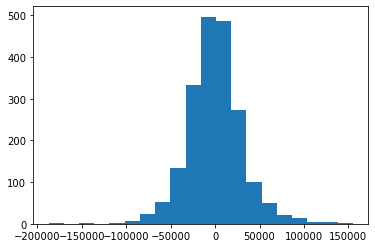

In [41]:
# N assumption:
#Check the normality (of residuals) assumption
plt.hist(residuals, bins = 20);

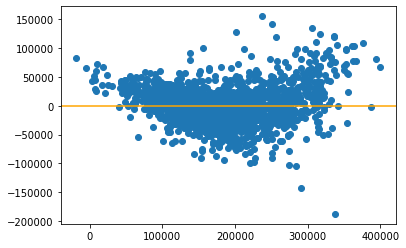

In [42]:
# L and E assumption
# our actual residuals
plt.scatter(predictions, residuals)
plt.axhline(0, color='orange');

### MSE and RMSE

In [43]:
# MSE for training
mean_squared_error(y_true=y_train, y_pred=train_pred)

947648468.7080024

In [44]:
# MSE for testing
mean_squared_error(y_true=y_test, y_pred=test_pred)

1032842706.634636

In [45]:
# RMSE for training
mean_squared_error(y_true=y_train, y_pred=train_pred, squared = False)

30783.899504578727

In [46]:
# RMSE for testing
mean_squared_error(y_true=y_test, y_pred=test_pred, squared = False)

32137.870287787213

## Coefficient of Determination, $R^2$

In [47]:
# Null prediction
null_prediction = y.mean()

In [48]:
# Null residuals
null_residuals = y - null_prediction

In [49]:
# Null sum of squares
null_ss = (null_residuals ** 2).sum()

In [50]:
null_ss

10617599577557.314

In [51]:
# R2 from model
R2 = round(lr.score(X, y),2)
R2

0.82

In [52]:
# # Adjusted R-squared: Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]
n = len(y)
k = len(features)

1 - ((1-R2)*(n-1)/(n-k-1))

0.8192796398199099

### Plotting residuals

In [53]:
train_resids = y_train - train_pred
test_resids = y_test - test_pred

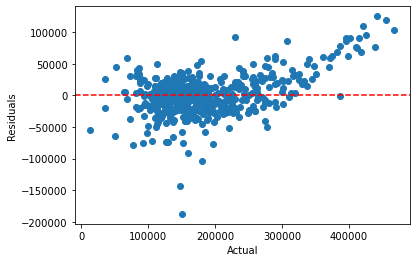

In [54]:
#plt resids
plt.scatter(y_test, test_resids)
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.axhline(0, c='red', linestyle='--')

### Plotting true vs. predicted

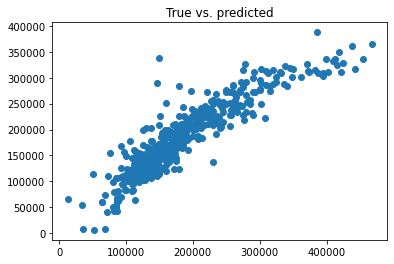

In [55]:
plt.scatter(y_test, test_pred)
plt.title('True vs. predicted');

### Export data

In [ ]:
# test_subset = test[X]
# test_preds = lr.predict(test_subset)

In [ ]:
# test['SalePrice'] = test_preds

In [ ]:
# test[['Id', 'SalePrice']].to_csv('submissions/second_model.csv', index=False)